<a href="https://colab.research.google.com/github/Kuntal-Das/notebooks/blob/main/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

print(tf.__version__)

EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

2.3.0


In [2]:
# import requests, zipfile, io
# r = requests.get( 'https://cdn.cs50.net/ai/2020/x/projects/5/gtsrb.zip' ) 
# z = zipfile.ZipFile(io.BytesIO(r.content))
# z.extractall()

In [3]:
def main():

    # Check command-line arguments
    # if len(sys.argv) not in [2, 3]:
    #     sys.exit("Usage: python traffic.py data_directory [model.h5]")

    # Get image arrays and labels for all image files
    # images, labels = load_data(sys.argv[1])
    images, labels = load_data("gtsrb")

    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), test_size=TEST_SIZE
    )

    # Get a compiled neural network
    model = get_model()

    # Fit model on training data
    model.fit(x_train, y_train, epochs=EPOCHS)

    # Evaluate neural network performance
    model.evaluate(x_test,  y_test, verbose=2)

    # Save model to file
    if len(sys.argv) == 3:
        filename = sys.argv[2]
        model.save(filename)
        print(f"Model saved to {filename}.")


In [4]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """

    images,labels = list(), list()

    for category in range(0,NUM_CATEGORIES):
        abs_dir_path = os.path.abspath(os.path.join("gtsrb",f"{category}"))
        imgs = os.listdir(abs_dir_path)
        for img_str in imgs:
            img_path = os.path.join(abs_dir_path,img_str)
            img = cv2.imread(img_path, 1)
            h, w = img.shape[:2]

            if (h, w) == (IMG_HEIGHT, IMG_WIDTH):
                images.append(img)
            elif h*w > IMG_HEIGHT*IMG_WIDTH:
                img = cv2.resize(img, (IMG_HEIGHT,IMG_WIDTH),interpolation=cv2.INTER_AREA)
                images.append(img)
            else:
                img = cv2.resize(img, (IMG_HEIGHT,IMG_WIDTH))
                images.append(img)
                
            labels.append(category)

    return (images,labels)
    # raise NotImplementedError

In [5]:
images, labels = load_data("gtsrb") #loading data

In [6]:
print(f"images : \n len:{len(images)} - shape:{(np.array(images)).shape}")
# images

images : 
 len:26640 - shape:(26640, 30, 30, 3)


In [7]:
print(f"labels:\n len:{len(labels)} - shape:{np.array(labels).shape}")


labels:
 len:26640 - shape:(26640,)


In [8]:
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
  np.array(images), np.array(labels), test_size=TEST_SIZE
)

In [9]:
print(f"labels:\n len:{len(labels)} - shape:{np.array(labels).shape}")
print(labels[-1])

labels:
 len:26640 - shape:(26640, 43)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
print(f"{x_train.shape} - {y_train.shape} - {x_test.shape} - {y_test.shape}")

(15984, 30, 30, 3) - (15984, 43) - (10656, 30, 30, 3) - (10656, 43)


In [11]:
# x_train = x_train/255.0

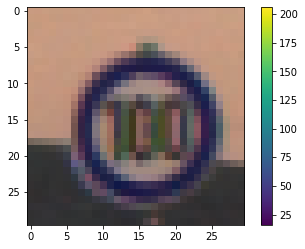

category : (array([7]),)


In [12]:
i = 100
plt.figure()
plt.imshow(x_train[i])
plt.colorbar()
plt.grid(False)
plt.show()
print(f"category : {np.where(y_train[i] == 1)}")
# np.where(y_train[i] == 1)

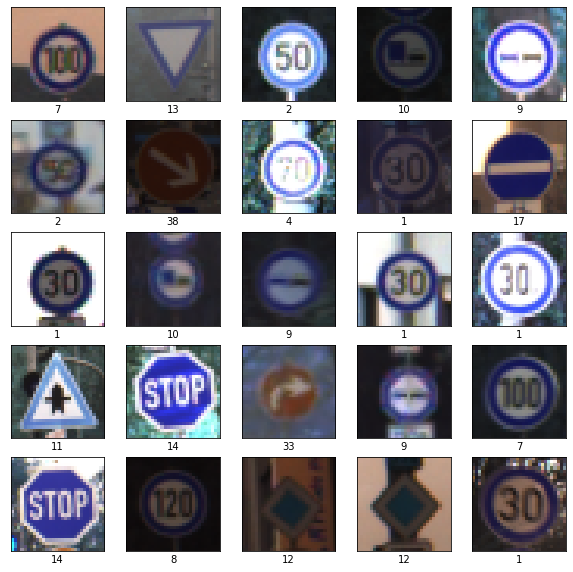

In [13]:
plt.figure(figsize=(10,10))
x = 100
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[x+i])
    plt.xlabel(np.argmax(y_train[x+i]))
plt.show()

In [14]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    
    model = tf.keras.Sequential([
      #Input layer of 30x30 RGB image
      tf.keras.Input(shape=(30, 30, 3)),
      
      # Convolutional layer. Learn 32 filters using a 5x5 kernel
      tf.keras.layers.Conv2D(32, 5, activation='relu'),
      
      # Max-pooling layer, using 2x2 pool size
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),

      # Flatten units
      tf.keras.layers.Flatten(),
      
      # Add a hidden layer with dropout
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.4),

      tf.keras.layers.Dense(43,activation="softmax")
    ],
    name = "traffic"
    )

    model.compile(optimizer='adam',
                  loss="categorical_crossentropy",#tf.keras.losses.categorical_crossentropy, 
                  metrics=['accuracy'])
    
    return model
    # raise NotImplementedError

In [15]:
# Get a compiled neural network
model = get_model()
model.summary()

Model: "traffic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0   

In [16]:
# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/10
500/500 [==============================] - 15s 30ms/step - loss: 2.5900 - accuracy: 0.4014
Epoch 2/10
500/500 [==============================] - 15s 30ms/step - loss: 0.9195 - accuracy: 0.7435
Epoch 3/10
500/500 [==============================] - 15s 30ms/step - loss: 0.5081 - accuracy: 0.8578
Epoch 4/10
500/500 [==============================] - 15s 30ms/step - loss: 0.4133 - accuracy: 0.8866
Epoch 5/10
500/500 [==============================] - 15s 30ms/step - loss: 0.3160 - accuracy: 0.9139
Epoch 6/10
500/500 [==============================] - 15s 30ms/step - loss: 0.2593 - accuracy: 0.9285
Epoch 7/10
500/500 [==============================] - 15s 30ms/step - loss: 0.2378 - accuracy: 0.9346
Epoch 8/10
500/500 [==============================] - 15s 30ms/step - loss: 0.2342 - accuracy: 0.9362
Epoch 9/10
500/500 [==============================] - 15s 30ms/step - loss: 0.2182 - accuracy: 0.9391
Epoch 10/10
500/500 [==============================] - 15s 30ms/step - loss: 0.171

In [17]:
# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

333/333 - 3s - loss: 0.1805 - accuracy: 0.9602


[0.18049906194210052, 0.9602102041244507]